<a href="https://colab.research.google.com/github/Anushka35/Global_Terrorism_Analysis/blob/main/German_Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/german_credit_data.csv')

## Univariate Analysis

<b>FOR CATEGORICAL ATTRIBUTES:</b>








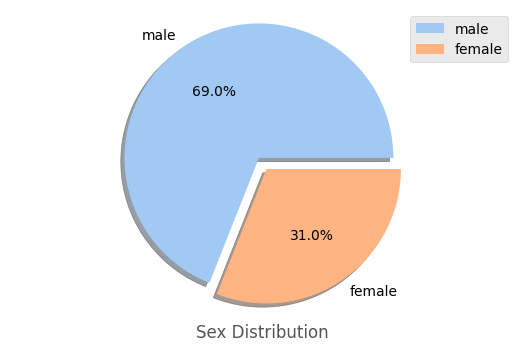

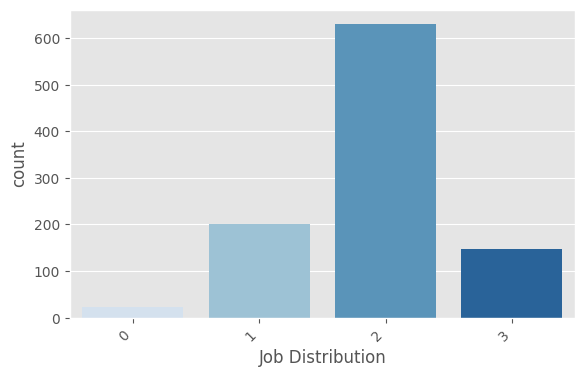

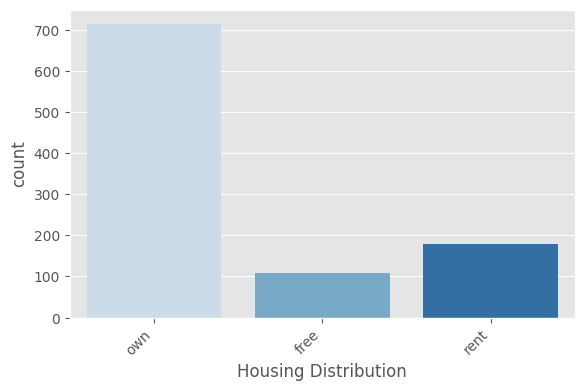

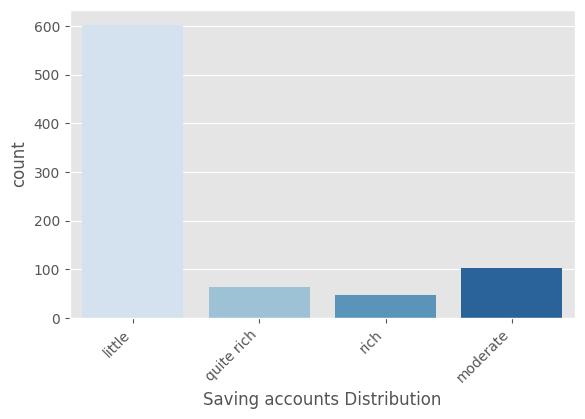

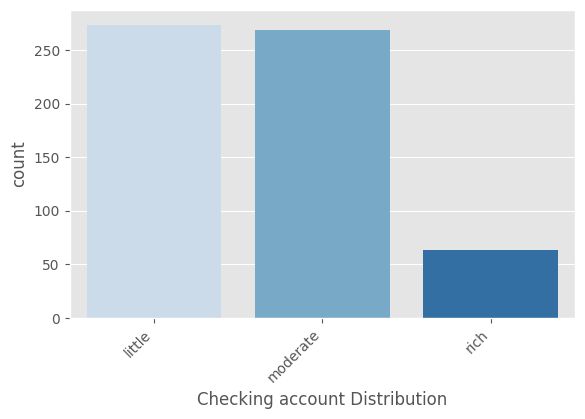

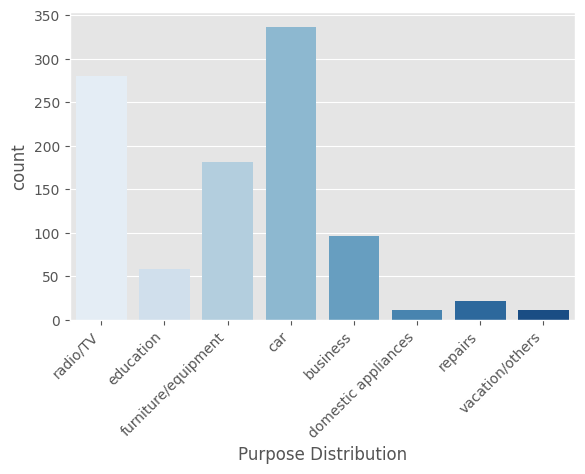

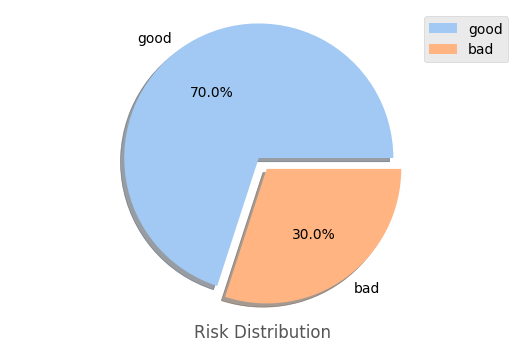

In [ ]:
def categorical_plots(var, data):
    fig = plt.figure(figsize=(15, 4))
    fig.subplots_adjust(wspace=0.3)
    plt.style.use('ggplot')

    num_categories = len(var.unique())

    if num_categories > 2:
        plt.subplot(1, 2, 1)
        sns.countplot(x=var, data=data, palette='Blues')
        plt.xticks(rotation=45, horizontalalignment='right')
        plt.xlabel(var.name + ' Distribution')

    else:
        labels = var.value_counts().index
        explode1 = (0.1, 0)
        ax1 = plt.subplot(1, 2, 2)
        ax1.pie(var.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True,explode=explode1,
                colors=sns.color_palette('pastel'))
        ax1.axis('equal')
        plt.xlabel(var.name + ' Distribution')
        plt.legend()

    plt.show()

categorical_attributes = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

for attribute in categorical_attributes:
    categorical_plots(df[attribute], df)

<b>FOR NUMERICAL ATTRIBUTES:</b>

<ipython-input-4-6a98014f21a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='b')


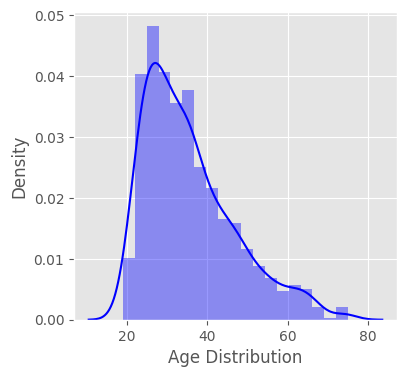

<ipython-input-4-6a98014f21a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='b')


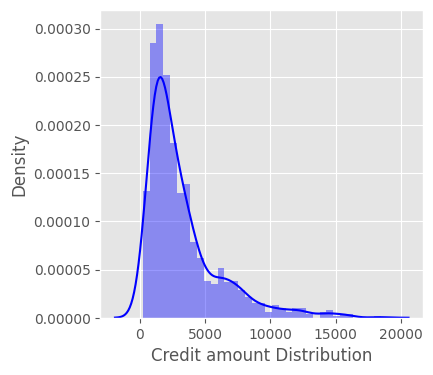

<ipython-input-4-6a98014f21a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(var, color='b')


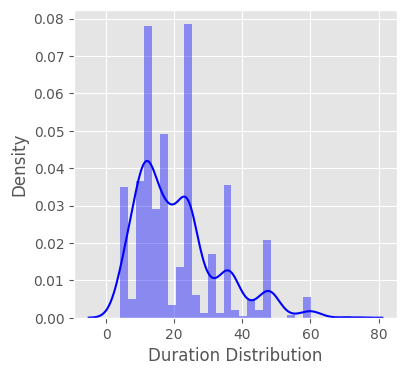

In [ ]:
def numerical_plots(var):
    fig = plt.figure(figsize=(15,4))
    fig.subplots_adjust(wspace=0.3)
    plt.subplot(1,3,1)
    sns.distplot(var, color='b')
    plt.xlabel(var.name + ' Distribution')
    show=plt.show()
    return(show)

numerical_attributes = ['Age','Credit amount','Duration']

for attribute in numerical_attributes:
    numerical_plots(df[attribute])

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-6-4febadc2e5c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


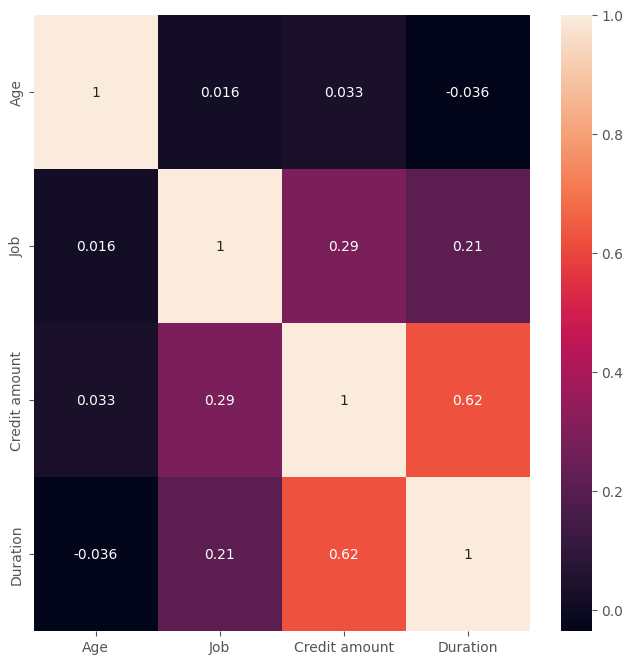

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

**BIVARIATE ANALYSIS**

**Risk Distribution Across Age Groups**

In [ ]:
df_plot = df.groupby(['Age', 'Risk']).size().reset_index(name='Count')

fig = px.bar(df_plot, x='Age', y='Count', color='Risk', barmode='group',
             color_discrete_sequence=[px.colors.sequential.Viridis_r[2], px.colors.sequential.Viridis_r[5]],
             title='Risk Distribution Across Age Groups')
fig.update_traces(hovertemplate='<b>%{x}</b><br><br>' + 'Count: %{y}')

fig.update_layout(xaxis_title='Age', yaxis_title='Count', legend_title='Risk')

fig.show()

**Loan Purpose by Gender**

In [ ]:
grouped_df = df.groupby(['Purpose', 'Sex']).size().reset_index(name='Count')

color_scale = ['#7B6CDE', '#513D8F']

fig = px.bar(grouped_df, x='Purpose', y='Count', color='Sex', barmode='stack',
             color_discrete_sequence=color_scale)

fig.update_layout(
    title='Loan Purpose by Gender',
    xaxis=dict(title='Purpose for Loan'),
    yaxis=dict(title='Count'),
    legend=dict(title='Gender')
)

fig.show()

**Sum of Credit Amount Distribution by Gender**

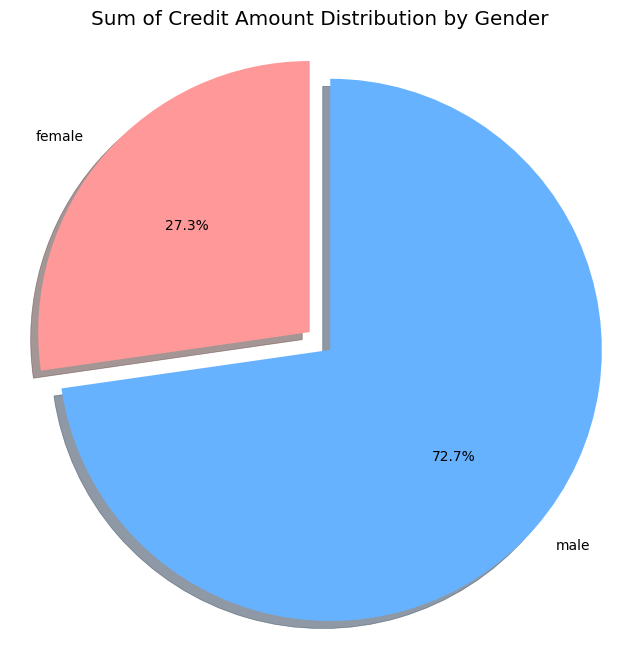

In [ ]:
creditsum_by_sex = df.groupby('Sex')['Credit amount'].sum()

colors = ['#FF9999', '#66B2FF']

explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(creditsum_by_sex.values, labels=creditsum_by_sex.index, autopct='%1.1f%%', colors=colors, explode=explode,
        shadow=True, startangle=90)
plt.title("Sum of Credit Amount Distribution by Gender")
plt.axis('equal')
plt.show()

**Gender Distribution by Risk**

In [ ]:
women_data = df[df["Sex"] == "female"]
men_data = df[df["Sex"] == "male"]

wg_counts = women_data[women_data["Risk"] == "good"].shape[0]
wb_counts = women_data[women_data["Risk"] == "bad"].shape[0]
mg_counts = men_data[men_data["Risk"] == "good"].shape[0]
mb_counts = men_data[men_data["Risk"] == "bad"].shape[0]

fig = plotly.tools.make_subplots(rows=1, cols=2, subplot_titles=("Women Risk Distribution", "Men Risk Distribution"))

fig.add_trace(go.Pie(labels=['Good Risk', 'Bad Risk'], values=[wg_counts, wb_counts],domain=dict(x=[0, 0.5]),
                     hole=0.4, marker=dict(colors=["#3c6dcf", "#8fb3e6"])))

fig.add_trace(go.Pie(labels=['Good Risk', 'Bad Risk'], values=[mg_counts, mb_counts],domain=dict(x=[0.5, 1]),
                     hole=0.4, marker=dict(colors=["#3c6dcf", "#8fb3e6"])))

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=12,
)

fig.update_layout(
    title="Sex Distribution by Risk",
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



**Distribution of Housing Types by Job**

In [ ]:
jh_counts = df.groupby(['Housing', 'Job']).size().unstack()

colors = px.colors.qualitative.Pastel1

fig = go.Figure()

for i, job_type in enumerate(jh_counts.columns):
    fig.add_trace(go.Bar(x=jh_counts.index, y=jh_counts[job_type],
                         name=job_type, marker_color=colors[i]))

fig.update_layout(barmode='stack', xaxis_tickangle=-45,
                  xaxis=dict(title='Housing'), yaxis=dict(title='Count'),
                  title='Distribution of Housing Types by Job', plot_bgcolor='white')

fig.show()

**Average Credit Amount by Job**

In [ ]:
grouped_df = df.groupby('Job')['Credit amount'].mean().reset_index()

fig = px.bar(grouped_df, x='Job', y='Credit amount',
             color='Job', color_continuous_scale='Blues')

fig.update_layout(
    title='Average Credit Amount by Job',
    xaxis=dict(title='Job'),
    yaxis=dict(title='Average Credit Amount'),
    plot_bgcolor='white'
)

fig.show()

**Distribution of Risk by Housing Type**

In [ ]:
grouped_df = df.groupby(['Housing', 'Risk']).size().reset_index(name='Count')

fig = px.sunburst(grouped_df, path=['Housing', 'Risk'], values='Count',
                  title='Distribution of Risk by Housing Type',
                  color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(plot_bgcolor='white')

fig.show()

**Risk Distribution by Saving Accounts**

In [ ]:
grouped_df = df.groupby(["Saving accounts", "Risk"]).size().reset_index(name="Count")
total_counts = grouped_df.groupby("Saving accounts")["Count"].transform("sum")
grouped_df["Percentage"] = (grouped_df["Count"] / total_counts) * 100

fig = go.Figure(data=[
    go.Bar(name="Good", x=grouped_df[grouped_df["Risk"] == "good"]["Saving accounts"],
           y=grouped_df[grouped_df["Risk"] == "good"]["Percentage"],
           marker_color="#8D81B0",
           text=grouped_df[grouped_df["Risk"] == "good"]["Percentage"].round(2).astype(str) + "%",
           textposition="auto"),
    go.Bar(name="Bad", x=grouped_df[grouped_df["Risk"] == "bad"]["Saving accounts"],
           y=grouped_df[grouped_df["Risk"] == "bad"]["Percentage"],
           marker_color="#9B539C",
           text=grouped_df[grouped_df["Risk"] == "bad"]["Percentage"].round(2).astype(str) + "%",
           textposition="auto")
])

fig.update_layout(
    barmode='group',
    xaxis_title="Saving Accounts",
    yaxis_title="Percentage",
    title="Saving Account Distribution by Risk",
    showlegend=True
)

fig.update_traces(hovertemplate="%{text}")

fig.show()

**Checking Account Counting by Risk**

In [ ]:
grouped_df = df.groupby(["Checking account", "Risk"]).size().reset_index(name="Count")
total_counts = grouped_df.groupby("Checking account")["Count"].transform("sum")
grouped_df["Percentage"] = (grouped_df["Count"] / total_counts) * 100

fig = go.Figure(data=[
    go.Bar(name="Good", x=grouped_df[grouped_df["Risk"] == "good"]["Checking account"],
           y=grouped_df[grouped_df["Risk"] == "good"]["Percentage"],
           marker_color="#4C78A8",
           text=grouped_df[grouped_df["Risk"] == "good"]["Percentage"].round(2).astype(str) + "%",
           textposition="auto"),
    go.Bar(name="Bad", x=grouped_df[grouped_df["Risk"] == "bad"]["Checking account"],
           y=grouped_df[grouped_df["Risk"] == "bad"]["Percentage"],
           marker_color="#ECA03D",
           text=grouped_df[grouped_df["Risk"] == "bad"]["Percentage"].round(2).astype(str) + "%",
           textposition="auto")
])

fig.update_layout(
    barmode='group',
    xaxis_title="Checking Account",
    yaxis_title="Percentage",
    title="Checking Account Distribution by Risk",
    showlegend=True
)

fig.update_traces(hovertemplate="%{text}")

fig.show()

**Loan Durations by Purpose**

In [ ]:
fig = px.box(df, x='Purpose', y='Duration')

fig.update_layout(
    title='Distribution of Loan Durations by Purpose',
    xaxis=dict(title='Purpose'),
    yaxis=dict(title='Duration'),
)

fig.show()

**Risk Vs Purpose**

In [ ]:
risk_purpose_counts = df.groupby(['Purpose', 'Risk']).size().unstack()

total_count = risk_purpose_counts.sum(axis=1)

percentage_good_risk = (risk_purpose_counts['good'] / total_count) * 100
percentage_bad_risk = (risk_purpose_counts['bad'] / total_count) * 100

colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)']

fig = go.Figure()

for i, risk_category in enumerate(risk_purpose_counts.columns):
    fig.add_trace(go.Bar(
        x=risk_purpose_counts.index,
        y=risk_purpose_counts[risk_category],
        name=risk_category,
        marker_color=colors[i]
    ))

hover_text = [
    f'Total Count: {count}<br>Percentage of Good Risk: {percent_good:.2f}%<br>Percentage of Bad Risk: {percent_bad:.2f}%'
    for count, percent_good, percent_bad in zip(total_count, percentage_good_risk, percentage_bad_risk)
]
fig.update_traces(hovertext=hover_text, hoverinfo='text')

fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Purpose'),
    yaxis=dict(title='Count'),
    title='Risk vs. Purpose',
    legend=dict(title='Risk', x=1.02, y=1)
)

fig.show()

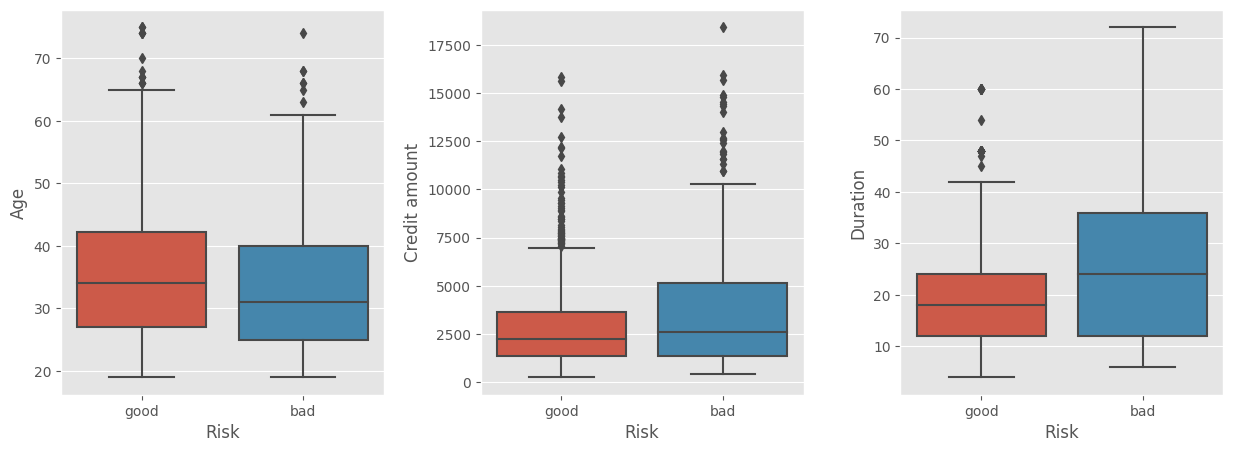

In [ ]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.3)

c=1
for i in df.columns:
    if df[i].dtype !='O' and i!='Job':
        plt.subplot(1,3,c)
        sns.boxplot(y=df[i], x=df.Risk)
        c+=1
plt.show()